In [1]:
# Description: Sentiment Analysis program that uses Twitter API to parse tweets and analyze overall sentiment of text
# Author: Kashish Kharbanda

In [2]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context("talk")
plt.style.use('fivethirtyeight')

In [3]:
# Twitter API credentials
api_creds = np.loadtxt('API-creds.txt', dtype = 'str')
consumer_key = api_creds[0]
consumer_secret = api_creds[1]
access_token = api_creds[2]
access_secret = api_creds[3]

In [4]:
# Authentication and set object
authenticate = tweepy.OAuthHandler(consumer_key, consumer_secret)
authenticate.set_access_token(access_token, access_secret)

In [5]:
# Creating the API + passing auth info 
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [6]:
# Extract 100 tweets from the twitter user
account = 'BarackObama' # fill with any other twitter handle 
posts = api.user_timeline(screen_name = account, count = 100, lang = 'en', tweet_mode = 'extended')

print('5 most recent tweets by @' + account + ':\n')
i = 1
for tweet in posts[0:5]:
    print(str(i) + '. ' + tweet.full_text + '\n')
    i += 1

5 most recent tweets by @BarackObama:

1. Congrats to @NASAJPL on landing @MarsPersevere today! Looking forward to seeing what this mission uncovers—and proud our administration invested in this effort eight years ago to help continue America’s rich tradition of exploration and discovery.

2. I felt inspired and hopeful after speaking with students in @TheTellingRoom’s Young Writers &amp; Leaders program. I wrote #APromisedLand in part because I hoped to reach young people like those in this group—the unique voices of a new generation, energized and unafraid to dream big. https://t.co/LP1Ri8Epva

3. Michelle and I are thinking of everyone across the country braving the winter storms this week. Here’s an overview of how you can help—or, if you’re in Texas, where you can go to stay warm or get support. https://t.co/zDnLrjOZ5i

4. Great news: Thanks to President Biden, starting today, you can go to https://t.co/ob1Ynoesod to sign up for health insurance. If you’re uninsured or hoping to c

In [7]:
# Create dataframe
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
df

,Tweets
0,Congrats to @NASAJPL on landing @MarsPersevere...
1,I felt inspired and hopeful after speaking wit...
2,Michelle and I are thinking of everyone across...
3,"Great news: Thanks to President Biden, startin..."
4,Happy Valentine’s Day to the three who never f...
...,...
95,Shoot your shot. https://t.co/XdZz4dh82T https...
96,Fired up to be with my friends @StevieWonder a...
97,"Don't boo — vote! Happy Halloween, everybody. ..."
98,"Three days, Michigan. Three days until the mos..."


In [8]:
# Function to clean tweet text
def cleanText(txt):
    txt = re.sub(r'@[A-Za-z0-9]+:?[\s]+', '', txt) # Remove @ mentions
    txt = re.sub(r'#', '', txt) # Remove '#' symbol
    txt = re.sub(r'RT[\s]+', '', txt) # Remove 'RT' for retweets
    txt = re.sub(r'https?:\/\/\S+', '', txt) # Removes any links
    txt = re.sub(r'\n', ' ', txt) # Removes '\n' for enter
    return txt

In [9]:
df['Tweets'] = df['Tweets'].apply(cleanText)
df

,Tweets
0,Congrats to on landing today! Looking forward ...
1,I felt inspired and hopeful after speaking wit...
2,Michelle and I are thinking of everyone across...
3,"Great news: Thanks to President Biden, startin..."
4,Happy Valentine’s Day to the three who never f...
...,...
95,Shoot your shot.
96,Fired up to be with my friends and in Detroit ...
97,"Don't boo — vote! Happy Halloween, everybody."
98,"Three days, Michigan. Three days until the mos..."


In [10]:
# Create a function to get subjectivity - how subjective/opiniated text is
def getSubjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity

# Create a function to get polarity - how positive/negative text is
def getPolarity(txt):
    return TextBlob(txt).sentiment.polarity

# Add as columns to df
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)
df

,Tweets,Subjectivity,Polarity
0,Congrats to on landing today! Looking forward ...,0.875000,0.587500
1,I felt inspired and hopeful after speaking wit...,0.470909,0.142273
2,Michelle and I are thinking of everyone across...,0.600000,0.600000
3,"Great news: Thanks to President Biden, startin...",0.412500,0.425000
4,Happy Valentine’s Day to the three who never f...,0.620000,0.500000
...,...,...,...
95,Shoot your shot.,0.000000,0.000000
96,Fired up to be with my friends and in Detroit ...,0.694444,0.318182
97,"Don't boo — vote! Happy Halloween, everybody.",1.000000,0.800000
98,"Three days, Michigan. Three days until the mos...",0.611111,0.383333


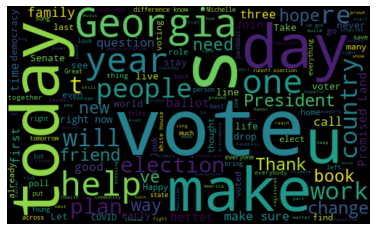

In [11]:
# Word Cloud plot
words = ' '.join([tweets for tweets in df['Tweets']])
wordcloud = WordCloud(width = 500, height = 300, max_font_size = 110).generate(words)

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [12]:
# Function to compute negative, neutral, and positive analysis
def getAnalysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
df['Analysis'] = df['Polarity'].apply(getAnalysis)
df

,Tweets,Subjectivity,Polarity,Analysis
0,Congrats to on landing today! Looking forward ...,0.875000,0.587500,Positive
1,I felt inspired and hopeful after speaking wit...,0.470909,0.142273,Positive
2,Michelle and I are thinking of everyone across...,0.600000,0.600000,Positive
3,"Great news: Thanks to President Biden, startin...",0.412500,0.425000,Positive
4,Happy Valentine’s Day to the three who never f...,0.620000,0.500000,Positive
...,...,...,...,...
95,Shoot your shot.,0.000000,0.000000,Neutral
96,Fired up to be with my friends and in Detroit ...,0.694444,0.318182,Positive
97,"Don't boo — vote! Happy Halloween, everybody.",1.000000,0.800000,Positive
98,"Three days, Michigan. Three days until the mos...",0.611111,0.383333,Positive


In [13]:
# Positive Tweets
sortedDF = df.sort_values(by=['Polarity'])
j = 1
for i in range(0, sortedDF.shape[0]):
    if sortedDF['Analysis'][i] == 'Positive':
        print(str(j) + ". " + sortedDF['Tweets'][i] + "\n")
        j += 1

1. Congrats to on landing today! Looking forward to seeing what this mission uncovers—and proud our administration invested in this effort eight years ago to help continue America’s rich tradition of exploration and discovery.

2. I felt inspired and hopeful after speaking with students in @TheTellingRoom’s Young Writers &amp; Leaders program. I wrote APromisedLand in part because I hoped to reach young people like those in this group—the unique voices of a new generation, energized and unafraid to dream big. 

3. Michelle and I are thinking of everyone across the country braving the winter storms this week. Here’s an overview of how you can help—or, if you’re in Texas, where you can go to stay warm or get support. 

4. Great news: Thanks to President Biden, starting today, you can go to  to sign up for health insurance. If you’re uninsured or hoping to change plans, here’s a good article that can help you figure out if you’re eligible. 

5. Happy Valentine’s Day to the three who never

In [14]:
# Negative Tweets
sortedDF = df.sort_values(by=['Polarity'], ascending=False)
j = 1
for i in range(0, sortedDF.shape[0]):
    if sortedDF['Analysis'][i] == 'Negative':
        print(str(j) + ". " + sortedDF['Tweets'][i] + "\n")
        j += 1

1. When Jackie Robinson faced down slurs, spiked cleats, and pitches aimed at his head—and stole home anyway—he didn't only change baseball. He changed the world and paved the way for others, including me. On his birthday, we’re called not only to honor that legacy but build on it. 

2. And here’s a look back at the response to last summer’s Black Lives Matter protests.  

3. In A Promised Land, I talk about the decisions I had to make during the first few years of my presidency. Here are some thoughts on how I approach tough questions: 

4. There's a reason some folks are trying to make it hard for you to vote: They know that if you do, things change. And that's why the answer isn't to stay at home. It's to turn out like never before and show them what this country stands for.

5. We’ve got to vote up and down the ticket like never before for Democratic candidates. Join me for a drive-in rally in Georgia with and @ReverendWarnock. 



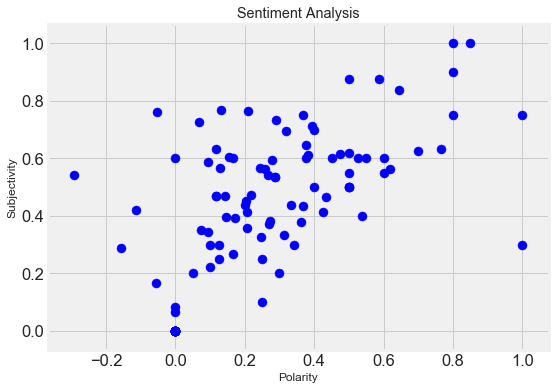

In [26]:
# Plot polarity vs subjectivity
plt.figure(figsize = (8, 6))
for i in range(0, df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color = 'Blue')
    
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [28]:
# Calculated percent of positive, negative, or neutral tweets
def percentSentiment(metric): # argument is either 'Positive', 'Negative', or 'Neutral'
    tweets = df[df.Analysis == metric] 
    return str((tweets.shape[0] / df.shape[0]) * 100) + '% of @' + account + '\'s tweets are ' + metric
    
print(percentSentiment('Positive'))
print(percentSentiment('Negative'))
print(percentSentiment('Neutral'))

78.0% of @BarackObama's tweets are Positive
5.0% of @BarackObama's tweets are Negative
17.0% of @BarackObama's tweets are Neutral


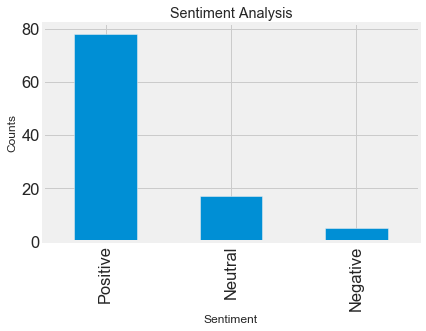

In [17]:
df['Analysis'].value_counts()

# Plot and visualize counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

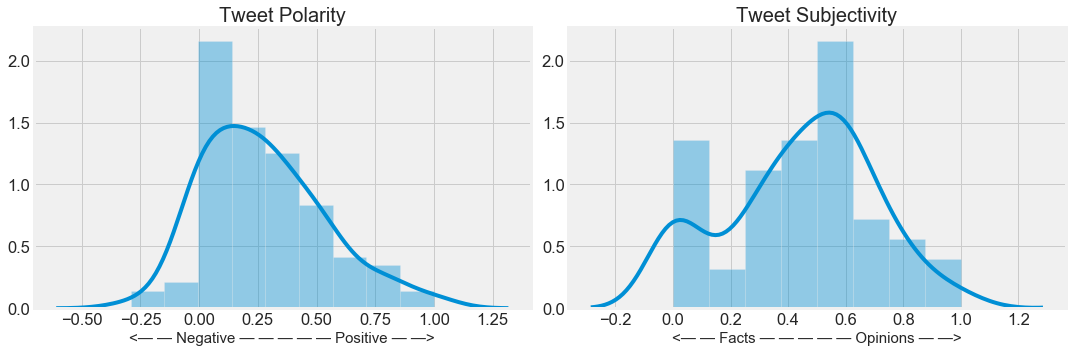

In [24]:
f, axs = plt.subplots(1, 2, figsize=(15,5))

# Plot overall trajectory of polarity & subjectivity 
sns.distplot(df['Polarity'], ax = axs[0])
axs[0].set_title('Tweet Polarity', fontsize = 20)
axs[0].set_xlabel('<— — Negative — — — — — Positive — —>', fontsize = 15)
sns.distplot(df['Subjectivity'], ax = axs[1])
axs[1].set_title("Tweet Subjectivity", fontsize = 20)
axs[1].set_xlabel('<— — Facts — — — — — Opinions — —>', fontsize = 15)

plt.tight_layout()